In [1]:
# 라이브러리 임포트
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn.cluster import KMeans  # K-means 임포트

from sklearn.preprocessing import StandardScaler

In [2]:
x = pd.read_excel('dataset/syn_unbalance.xlsx', header = None)
x = np.r_[x]
x_df = pd.DataFrame(x, columns=['X1', 'X2'])
x_df = np.array(x_df)

In [3]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(x_df)
x_df = scale.transform(x_df)
x_df

array([[-0.60000637, -0.42472232],
       [-0.55281982, -0.25470141],
       [-0.70180454, -0.34044291],
       ...,
       [ 3.94774598,  1.8554169 ],
       [ 3.88847212,  1.94664127],
       [ 3.72401564,  2.0221481 ]])

In [4]:
# 파라미터 설정
num_clusters = 8 # 군집 개수.

In [5]:
# K-means 군집화 알고리즘 실행
kmeans = KMeans(n_clusters=num_clusters, init='k-means++')
kmeans.fit(x_df)
kmeans.labels_

array([4, 4, 4, ..., 6, 6, 6], dtype=int32)

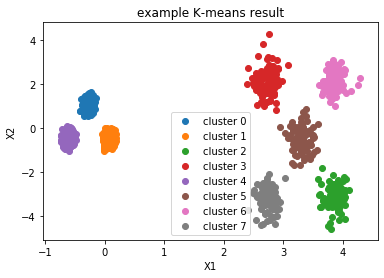

In [6]:
unique_labels = np.unique(kmeans.labels_)  # 군집 종류

centroids = []
for i in unique_labels:  # 각 군집에 대해
    cluster_instance_mask = (kmeans.labels_ == i)
    
    x_cluster_i = x_df[cluster_instance_mask, :]  # 해당 군집에 해당하는 인스턴스
    centroids.append(np.mean(x_cluster_i, axis=0))

    plt.scatter(x_cluster_i[:, 0], x_cluster_i[:, 1], label='cluster ' + str(i))

plt.title('example K-means result')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

In [34]:
# DBSCAN
from sklearn.cluster import DBSCAN  # DBSCAN 임포트

# 파라미터 설정
eps = 0.4
min_samples = 2

In [35]:
# DBSCAN 군집화 알고리즘 실행
db = DBSCAN(eps=eps, min_samples=min_samples).fit(x_df)

# core sample들의 indicator
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
db.labels_

array([0, 0, 0, ..., 6, 6, 6])

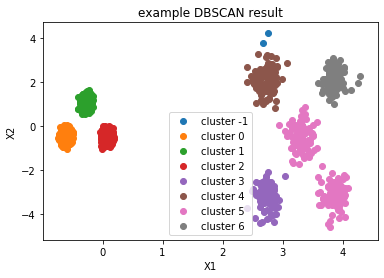

In [36]:
# 군집화 결과 plotting 1
unique_labels = np.unique(db.labels_)  # 군집 종류

for i in unique_labels:  # 각 군집에 대해
    cluster_instance_mask = (db.labels_ == i)
    
    x_cluster_i = x_df[cluster_instance_mask, :]  # 해당 군집에 해당하는 인스턴스
    
    plt.scatter(x_cluster_i[:, 0], x_cluster_i[:, 1], label='cluster ' + str(i))  # 1번째, 2번째 변수를 이용해 plotting

plt.title('example DBSCAN result')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()
# cluster -1은 아웃라이어

In [37]:
# Hierarchical clustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

# 파라미터 설정
num_clusters = 8
n_instances, n_dim = x_df.shape

In [38]:
# 계층적 군집화 알고리즘 (Agglomerative - Ward) 실행 
ward = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward').fit(x_df)
# ward.labels_

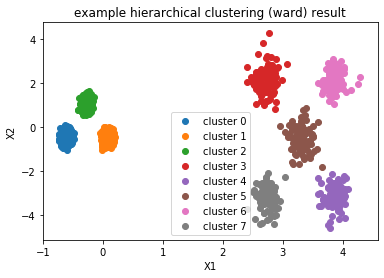

In [39]:
# 계층적 군집화 결과 plotting
unique_labels = np.unique(ward.labels_)

for i in unique_labels:
    cluster_member_mask = (ward.labels_ == i)
    x_cluster_i = x_df[cluster_member_mask, :]
    plt.scatter(x_cluster_i[:, 0], x_cluster_i[:, 1], label='cluster ' + str(i))

plt.title('example hierarchical clustering (ward) result')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()